<h1><b><center> Model Evaluation and Training </h1></b></center>

# **Training and Testing**

In [43]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mpl

In [44]:
df=pd.read_csv('autos_updated_4.13.23.csv', index_col=0)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body=style,drive-wheels,engine-location,wheel-base,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned
0,3,122,alfa-romero,0,0,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704,Low
1,3,122,alfa-romero,0,0,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704,Low
2,1,122,alfa-romero,0,0,two,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462,Medium
3,2,164,audi,0,0,four,sedan,fwd,front,99.8,...,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333,Low
4,2,164,audi,0,0,four,sedan,4wd,front,99.4,...,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818,Low


In [45]:
#Get only numeric data
df=df._get_numeric_data()
df.head()

,symboling,normalized-losses,fuel-type,aspiration,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,0,0,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122,0,0,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122,0,0,94.5,0.822681,0.909722,0.876254,2823,152,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164,0,0,99.8,0.848630,0.919444,0.908027,2337,109,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164,0,0,99.4,0.848630,0.922222,0.908027,2824,136,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818


In [46]:
#Put target data 'price' in a separate data frame
y_data=df['price']

#Drop the 'price' column in a new data frame
x_data=df.drop('price', axis=1)

In [47]:
#Split data into testing and training data
x_train, x_test, y_train, y_test=train_test_split(x_data, y_data, test_size=0.1, random_state=1) #10% of observations to test sets

print("Number of test samples :", x_test.shape[0])
print("Number of training samples:",x_train.shape[0])

Number of test samples : 21
Number of training samples: 180


In [48]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
#Fit the model using 'horsepower'
LR.fit(x_train[['horsepower']], y_train)

#Find R-squared of training data
LR.score(x_train[['horsepower']], y_train)

0.6622424809407366

In [49]:
#Find R-squared of testing data
LR.score(x_test[['horsepower']], y_test)

0.36339478087886834

# **Cross-Validation**
<p> An example of out-of-sample evaluation metrics </p>

In [50]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [51]:
cross_R = cross_val_score(LR, x_data[['horsepower']], y_data, cv=4) #the model, 'horsepower', 'price', 4 folds
cross_R

array([0.77477095, 0.51725019, 0.74924821, 0.04771764])

In [52]:
#Calculate mean and SD of the estimate
print("The mean of the folds are:", cross_R.mean(), "The standard deviation is:" , cross_R.std())

The mean of the folds are: 0.5222467481979471 The standard deviation is: 0.29176230741826353


In [53]:
#Use negative squared error as a score
-1 * cross_val_score(LR,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20240865.23167854, 43737944.37864215, 12470270.77569642,
       17574447.8797166 ])

You can also predict the output!

In [54]:
yhat = cross_val_predict(LR,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14144.56553323, 14144.56553323, 20819.140433  , 12747.56148444,
       14765.45622158])

# **Over/UnderFitting and Model Selection**
The testing data (out-of-sample data) is a **better** measure of real world performance of the model.

In [55]:
#Create a multiple regression object
LR = LinearRegression()
LR.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [56]:
#Create a prediction using training data
yhat_train = LR.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7425.12006788, 28327.02313301, 14210.29915814,  4054.61292262,
       34498.57562361])

In [61]:
#Create a prediction using training data
yhat_test = LR.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11350.96269501,  5884.81415149, 11206.85674887,  6640.86207975,
       15566.72516819])

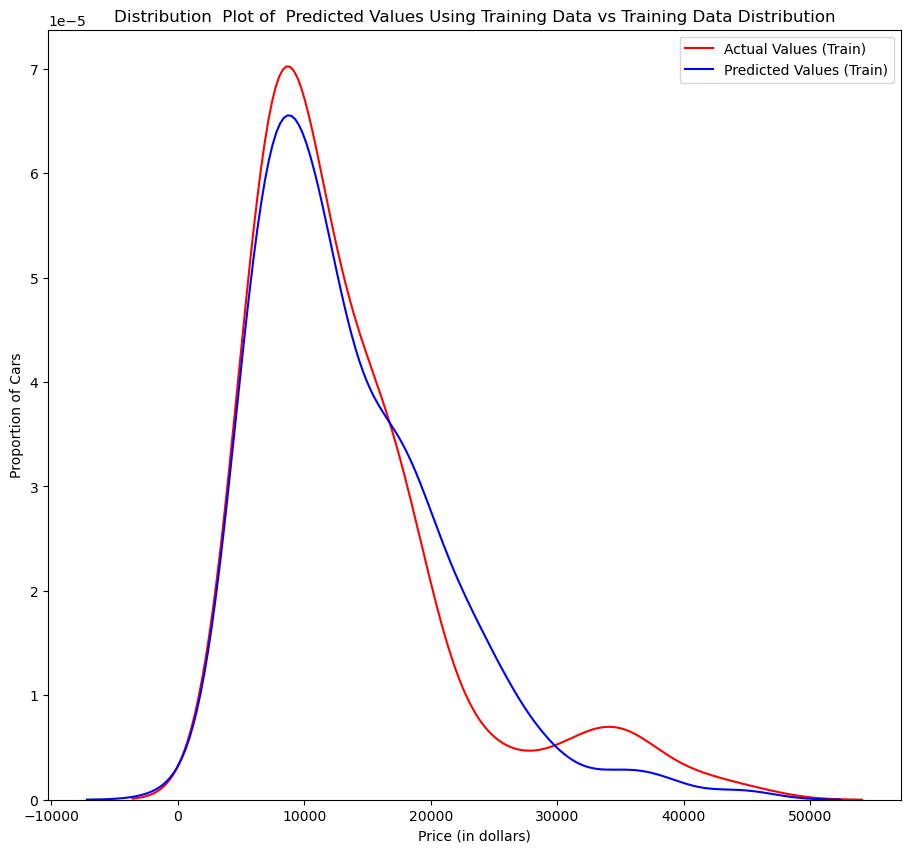

In [62]:
def DistributionPlot(RealValues, PredictedValues, RealName, PredictedName, Title):
    width = 11
    height = 10
    mpl.figure(figsize=(width, height))
    
    ax1=sns.kdeplot(RealValues, color='r', shade=False, label=RealName)
    ax2=sns.kdeplot(PredictedValues, color='b', shade=False, label=PredictedName)
   

    mpl.title(Title)
    mpl.xlabel('Price (in dollars)')
    mpl.ylabel('Proportion of Cars')
    mpl.legend()
    mpl.show()
    mpl.close()
Title = 'Distribution  Plot of  Predicted Values Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

We can see that the model is doing well from the training set! The actual training data closely resembles the predicted training data values. Time to test the training set.

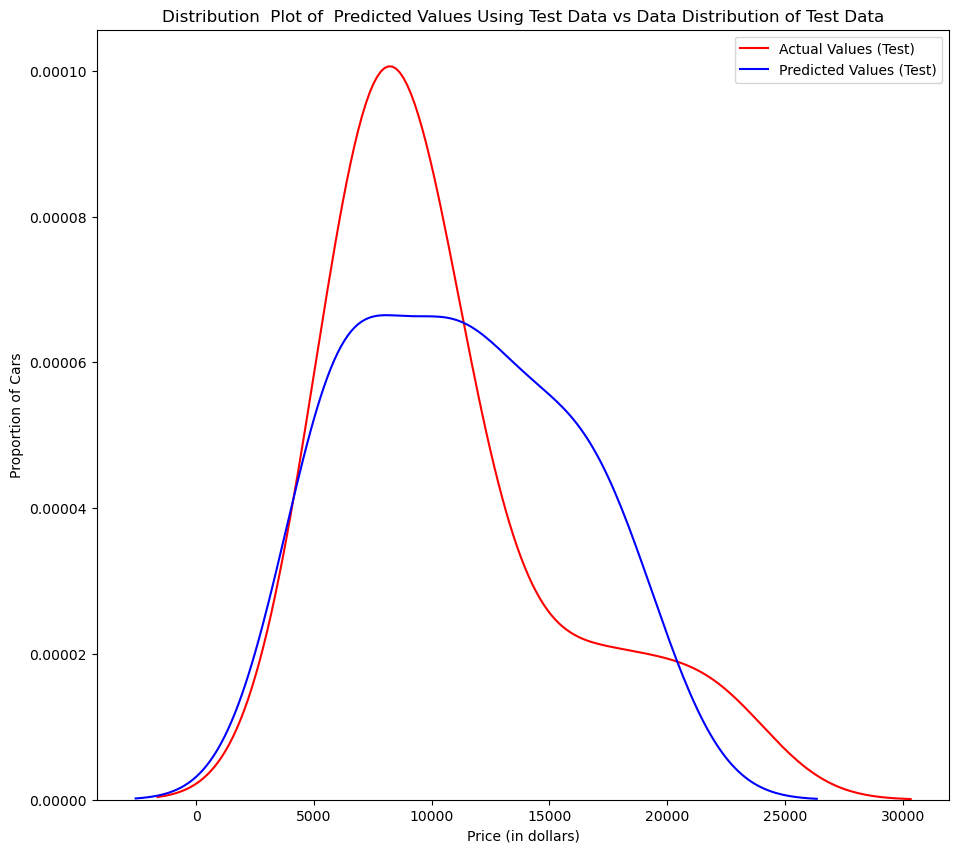

In [63]:
Title='Distribution  Plot of  Predicted Values Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

We can see that the model performs worse with the actual vs. predicted values of the testing dataset.

## **Overfitting the Data**
This is when the model fits the noise rather than the function.

### Example 1: Create a 5 degree polynomial transformation on 'horsepower'

In [78]:
from sklearn.preprocessing import PolynomialFeatures

In [79]:
#Use 55% of data for training, 45% for testing
x_train, x_test, y_train, y_test1= train_test_split(x_data, y_data, test_size=0.45, random_state=0) 

In [80]:
PF = PolynomialFeatures(degree=5)
x_train_pf = PF.fit_transform(x_train[['horsepower']])
x_test_pf = PF.fit_transform(x_test[['horsepower']])
PF

PolynomialFeatures(degree=5)

In [81]:
#Create a linear regression object
poly = LinearRegression()
poly.fit(x_train_pf, y_train)

LinearRegression()

In [82]:
yhat = poly.predict(x_test_pf)
yhat[0:5]

array([ 6722.92523963,  7301.45663996, 12214.1679257 , 18901.59817083,
       20000.14002037])

In [85]:
#Compare predicted values to actual values
print("Predicted values:", yhat[0:5])
print("True values:", y_test[0:5].values)

Predicted values: [ 6722.92523963  7301.45663996 12214.1679257  18901.59817083
 20000.14002037]
True values: [ 6295. 10698. 13860. 13499. 15750.]


In [89]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    mpl.figure(figsize=(width, height))
    
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    mpl.plot(xtrain, y_train, 'ro', label='Training Data')
    mpl.plot(xtest, y_test, 'go', label='Test Data')
    mpl.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    mpl.ylim([-10000, 60000])
    mpl.ylabel('Price')
    mpl.legend()

**Create a polynomial regression model with training data(red dots), test data (green dots) and a blue line for the polynomial function.**

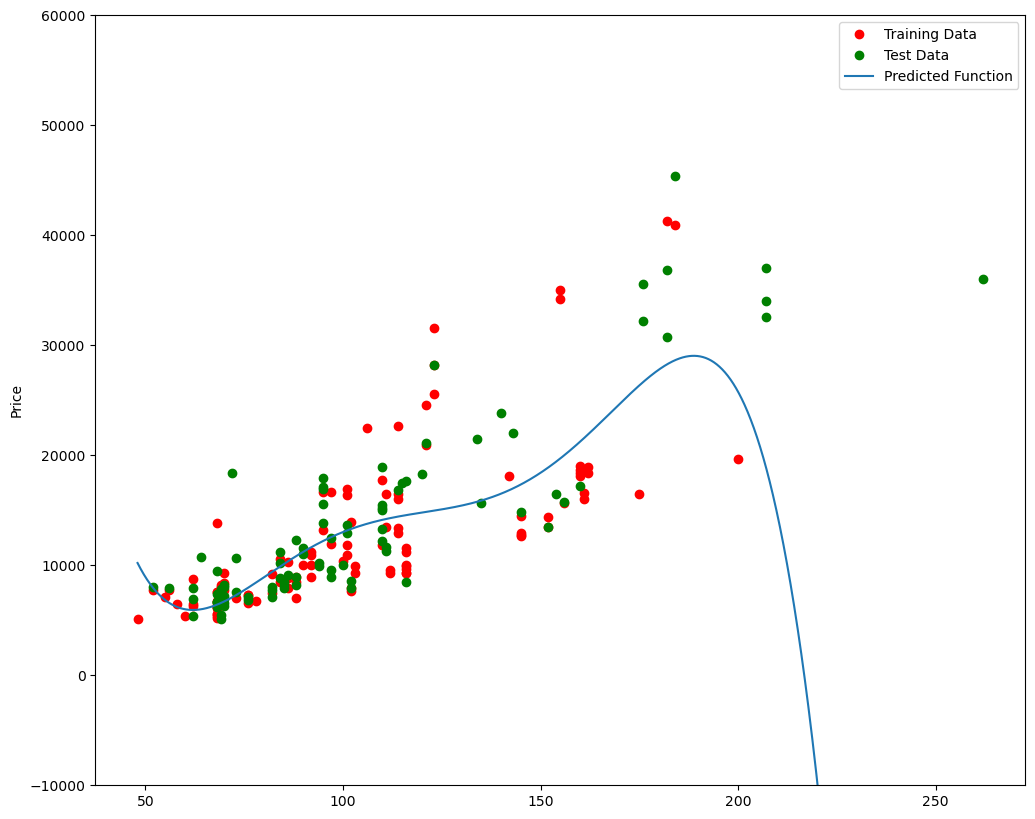

In [90]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,PF)

We can see that the function tracks the data up until approximately 200 horsepower and then drops off.

In [92]:
#Find R-squared for training data
poly.score(x_train_pf, y_train)

0.557175738532989

In [93]:
#Find R-squared for testing data 
poly.score(x_test_pf, y_test)

-29.624596453924124

A negative R-squared means that we have model overfitting. 

**How does the R-squared value change with different order polynomials?**

Text(3, 0.74, 'Maximum R-Squared ')

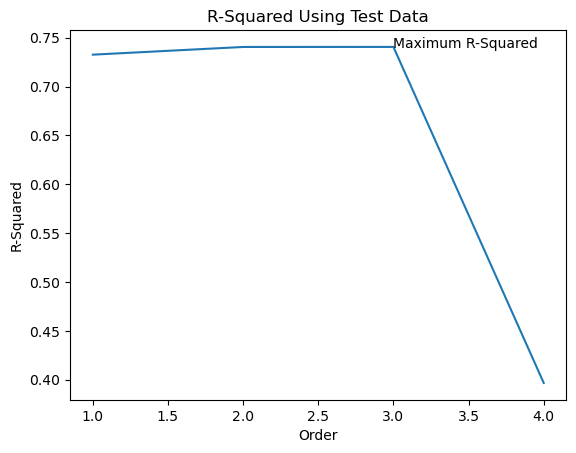

In [100]:
Rsqu_test = [] #Empty list to store values

#Create an itration sequence that goes through different polynomial orders
order = [1, 2, 3, 4]
for n in order:
    PF = PolynomialFeatures(degree=n)
    
    x_train_pr = PF.fit_transform(x_train[['horsepower']])
    
    x_test_pr = PF.fit_transform(x_test[['horsepower']])    
    
    LR.fit(x_train_pr, y_train) #Linear regression object
    
    Rsqu_test.append(LR.score(x_test_pr, y_test))

mpl.plot(order, Rsqu_test)
mpl.xlabel('Order')
mpl.ylabel('R-Squared')
mpl.title('R-Squared Using Test Data')
mpl.text(3, .74, 'Maximum R-Squared ')    

This means we should use a 3rd order polynomial to acheive a maximum R-squared value

# **Ridge Regression**
A method in which the coefficients of a multiple regression model are estimated and multicollinearity (strong relationship between independent variables) occurs.
<b>This prevents overfitting!</b>

In [101]:
from sklearn.linear_model import Ridge

In [102]:
#Perform a 2-degree polynomial transformation on the data
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [103]:
#Create Ridge regression object
RidgeModel=Ridge(alpha=1) #alpha is a hyperparameter

#Fit the model
RidgeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [105]:
#Obtain a prediction for testing data
yhat = RidgeModel.predict(x_test_pr)

In [109]:
#Compare the first 5 samples of the predicted samples to the test set
print('predicted:', yhat[0:5])
print('test set :', y_test[0:5].values)

predicted: [ 6577.53720013  9627.07836056 20940.46130682 19402.66018406
 21404.45726872]
test set : [ 6295. 10698. 13860. 13499. 15750.]


We now need to test for an alpha value that decreases the test error. 

In [131]:
Alpha = [0.001, 0.10, 1.0, 100, 1000]
R_sq_test=[]
R_sq_train=[]

for a in Alpha:
    RidgeModel = Ridge(alpha=a) 
    RidgeModel.fit(x_train_pr, y_train)
    test_score, train_score = RidgeModel.score(x_test_pr, y_test), RidgeModel.score(x_train_pr, y_train)

    R_sq_test.append(test_score)
    R_sq_train.append(train_score)
    print('alpha is:', a, 'Test Score:', test_score, 'Training Score:', train_score)
    

alpha is: 0.001 Test Score: 0.5220874831187503 Training Score: 0.8710698010037605
alpha is: 0.1 Test Score: 0.5264782363607388 Training Score: 0.871053655358028
alpha is: 1.0 Test Score: 0.533231926788483 Training Score: 0.870985120962713
alpha is: 100 Test Score: 0.5467621087063752 Training Score: 0.8665700080136279
alpha is: 1000 Test Score: 0.5396550504950675 Training Score: 0.8613204686266283


C:\Users\JoeDe\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.02971e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\JoeDe\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.02971e-16): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


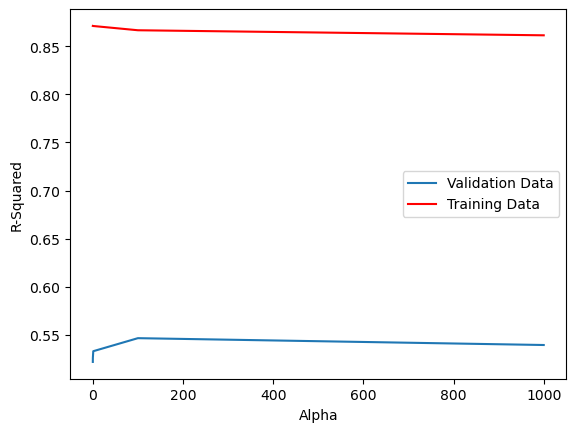

In [133]:
#Plot the R-squared value for different alphas
mpl.plot(Alpha, R_sq_test, label='Validation Data')
mpl.plot(Alpha, R_sq_train, 'r', label='Training Data ')
mpl.xlabel('Alpha')
mpl.ylabel('R-Squared')
mpl.legend()

# **Grid Search**
Find the best hyperparameter using cross-validation and splitting data into training, validation and testing sets.

In [134]:
from sklearn.model_selection import GridSearchCV

In [139]:
#Create a dictionary of parameter values
parameters1=[{'alpha':[0.001, 0.10, 1.0, 10, 100, 1000, 10000]}]

#Create a Ridge regresion object
RR=Ridge()

#Create a ridge grid search object
Grid1=GridSearchCV(RR, parameters1, cv=4)

#Fit the model
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1.0, 10, 100, 1000, 10000]}])

In [140]:
#Find best parameter value on validation data
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [142]:
#Find R-squared value using the best parameter value
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8412287494745087

## **Resources**

https://www.sharpsightlabs.com/blog/scikit-train_test_split/

https://realpython.com/train-test-split-python-data/

https://machinelearningcompass.com/machine_learning_models/ridge_regression/

https://www.geeksforgeeks.org/matplotlib-pyplot-legend-in-python/

https://machinelearningmastery.com/ridge-regression-with-python/

https://www.statology.org/sklearn-polynomial-regression/

This Jupyter Notebook was created to take notes for a lab assignment from the IBM Data Science Certificate through Coursera. The module is credited to:Joseph Santarcangelo, Mahdi Noorian, Bahare Talayian, Eric Xiao, Steven Dong, Parizad , Hima Vasudevan, Fiorella Wenver and Yi Yao. 